In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [5]:
df = pd.read_csv('/content/HRDataset_v14 (1).csv')
df.head()

,Employee_Name,EmpID,MarriedID,MaritalStatusID,GenderID,EmpStatusID,DeptID,PerfScoreID,FromDiversityJobFairID,Salary,...,ManagerName,ManagerID,RecruitmentSource,PerformanceScore,EngagementSurvey,EmpSatisfaction,SpecialProjectsCount,LastPerformanceReview_Date,DaysLateLast30,Absences
0,"Adinolfi, Wilson K",10026,0,0,1,1,5,4,0,62506,...,Michael Albert,22.0,LinkedIn,Exceeds,4.60,5,0,1/17/2019,0,1
1,"Ait Sidi, Karthikeyan",10084,1,1,1,5,3,3,0,104437,...,Simon Roup,4.0,Indeed,Fully Meets,4.96,3,6,2/24/2016,0,17
2,"Akinkuolie, Sarah",10196,1,1,0,5,5,3,0,64955,...,Kissy Sullivan,20.0,LinkedIn,Fully Meets,3.02,3,0,5/15/2012,0,3
3,"Alagbe,Trina",10088,1,1,0,1,5,3,0,64991,...,Elijiah Gray,16.0,Indeed,Fully Meets,4.84,5,0,1/3/2019,0,15
4,"Anderson, Carol",10069,0,2,0,5,5,3,0,50825,...,Webster Butler,39.0,Google Search,Fully Meets,5.00,4,0,2/1/2016,0,2


In [6]:
df.isnull().sum()

Employee_Name                   0
EmpID                           0
MarriedID                       0
MaritalStatusID                 0
GenderID                        0
EmpStatusID                     0
DeptID                          0
PerfScoreID                     0
FromDiversityJobFairID          0
Salary                          0
Termd                           0
PositionID                      0
Position                        0
State                           0
Zip                             0
DOB                             0
Sex                             0
MaritalDesc                     0
CitizenDesc                     0
HispanicLatino                  0
RaceDesc                        0
DateofHire                      0
DateofTermination             207
TermReason                      0
EmploymentStatus                0
Department                      0
ManagerName                     0
ManagerID                       8
RecruitmentSource               0
PerformanceSco

In [7]:
df['DateofTermination'] = df['DateofTermination'].fillna(df['DateofTermination'].mode())
df['ManagerID'] = df['ManagerID'].fillna(df['ManagerID'].mode())

In [8]:
df.ManagerID

0      22.0
1       4.0
2      20.0
3      16.0
4      39.0
       ... 
306    20.0
307    12.0
308     2.0
309     4.0
310    14.0
Name: ManagerID, Length: 311, dtype: float64

In [10]:
df["DOB"] = pd.to_datetime(df["DOB"])
df["DOB"].sort_values()

232   1973-01-12
174   1973-02-14
261   1973-03-12
265   1973-03-26
243   1973-04-05
         ...    
234   2072-07-03
127   2072-08-27
139   2072-09-11
175   2072-11-09
240   2072-11-21
Name: DOB, Length: 311, dtype: datetime64[ns]

In [11]:
def subtract_years(date):
    if date.year > 2000:
        return date.replace(year=date.year-100)
    else:
        return date
df["DOB"] = pd.to_datetime(df["DOB"])
df["DOB"] = df["DOB"].apply(subtract_years).dt.strftime('%d-%m-%Y')
df["DOB"].sort_values()

211    01-05-1979
32     01-06-1964
157    01-07-1972
184    01-07-1984
268    01-09-1986
          ...    
81     31-05-1974
47     31-05-1988
49     31-08-1981
65     31-10-1977
229    31-12-1984
Name: DOB, Length: 311, dtype: object

In [12]:
df["DateofHire"] = pd.to_datetime(df["DateofHire"])
df["DateofTermination"] = pd.to_datetime(df["DateofTermination"])
df["LastPerformanceReview_Date"] = pd.to_datetime(df["LastPerformanceReview_Date"])
df["DateofTermination"].sort_values()

280   2010-08-30
112   2011-05-30
50    2011-09-26
233   2011-10-22
296   2012-01-02
         ...    
305          NaT
306          NaT
308          NaT
309          NaT
310          NaT
Name: DateofTermination, Length: 311, dtype: datetime64[ns]

In [13]:
df["Employee_Name"] = df["Employee_Name"].str.replace(',', ' ')
df["Employee_Name"]

0           Adinolfi  Wilson  K
1      Ait Sidi  Karthikeyan   
2             Akinkuolie  Sarah
3                  Alagbe Trina
4              Anderson  Carol 
                 ...           
306              Woodson  Jason
307          Ybarra  Catherine 
308            Zamora  Jennifer
309                 Zhou  Julia
310               Zima  Colleen
Name: Employee_Name, Length: 311, dtype: object

In [14]:
df["HispanicLatino"].unique()

array(['No', 'Yes', 'no', 'yes'], dtype=object)

In [15]:
df["HispanicLatino"] = df["HispanicLatino"].str.replace('no' , 'No')
df["HispanicLatino"] = df["HispanicLatino"].str.replace('yes' , 'Yes')

In [16]:
df["Department"].unique()
df["Department"] = df["Department"].str.replace('   ' ,'')

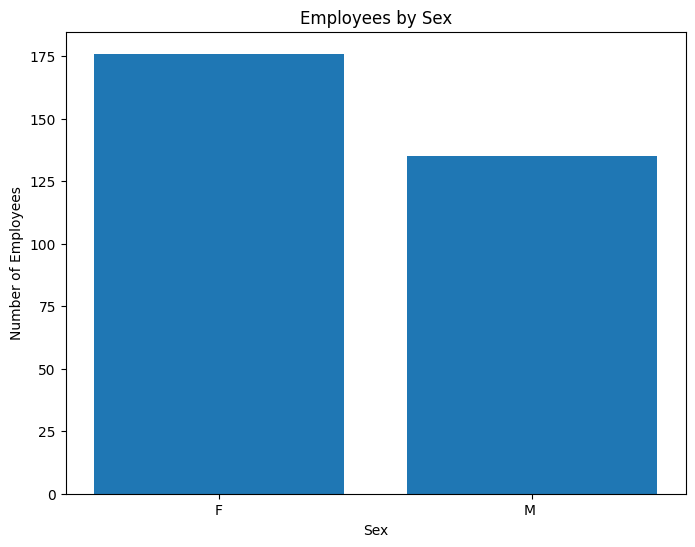

In [3]:
grouped = df.groupby('Sex')['Employee_Name'].count()

fig, ax = plt.subplots(figsize=(8, 6))
ax.bar(grouped.index, grouped.values)

ax.set_title('Employees by Sex')
ax.set_xlabel('Sex')
ax.set_ylabel('Number of Employees')

plt.show()

### **Got the insight that the female employee is comparetively higher than the Male employee in this company.**

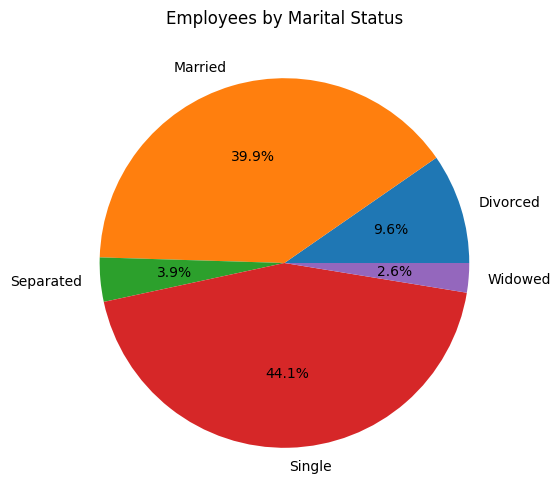

In [4]:
grouped = df.groupby('MaritalDesc')['Employee_Name'].count()

fig, ax = plt.subplots(figsize=(8, 6))
ax.pie(grouped.values, labels=grouped.index, autopct='%1.1f%%')

ax.set_title('Employees by Marital Status')

plt.show()

## **Through this Pie Chart we got the Ratio of Employees Marital Status were working the the Company.**

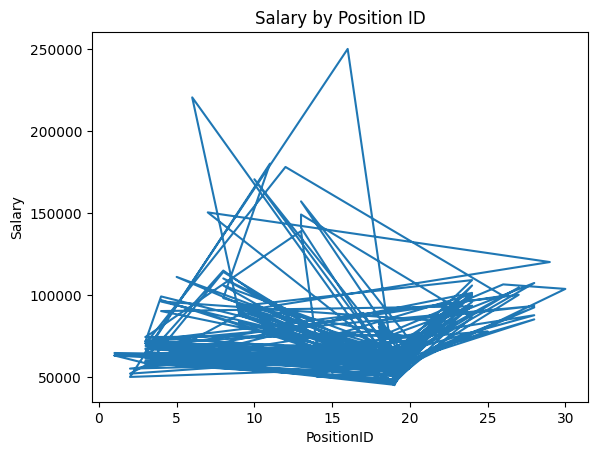

In [18]:
plt.plot(df['PositionID'], df['Salary'])
plt.title('Salary by Position ID')
plt.xlabel('PositionID')
plt.ylabel('Salary')
plt.show() 

## **Through this Char we got rough Data between the employee having salary in relation to their position**

<Axes: xlabel='DeptID', ylabel='Salary'>

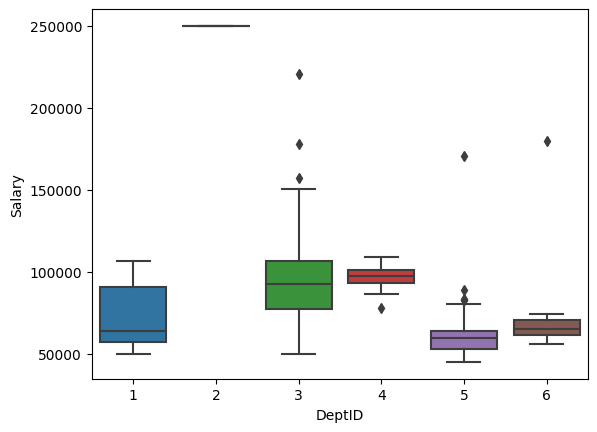

In [19]:
sns.boxplot(x='DeptID', y='Salary', data=df)

## This Box Plot shows the salaried employee in DeptID 4 getting the higher average Salary compare to other.**bold text** bold text

Text(0.5, 1.0, 'Average Salary by Position')

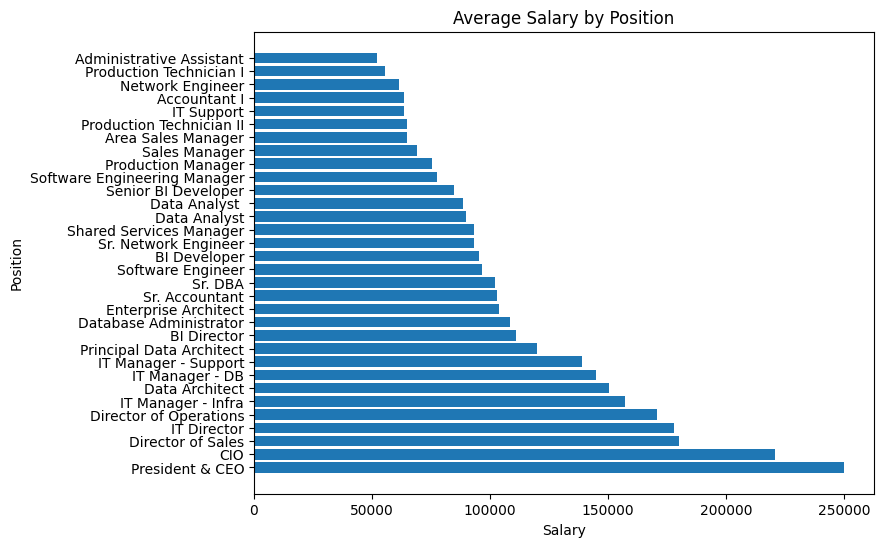

In [20]:
grouped = df.groupby('Position')['Salary'].mean()

grouped = grouped.sort_values(ascending=False)

fig, ax = plt.subplots(figsize=(8, 6))
ax.barh(grouped.index, grouped.values)

ax.set_xlabel('Salary')
ax.set_ylabel('Position')
ax.set_title('Average Salary by Position')


## **Through this graph we can have idea related to the position of employee with relate to the their Salary**

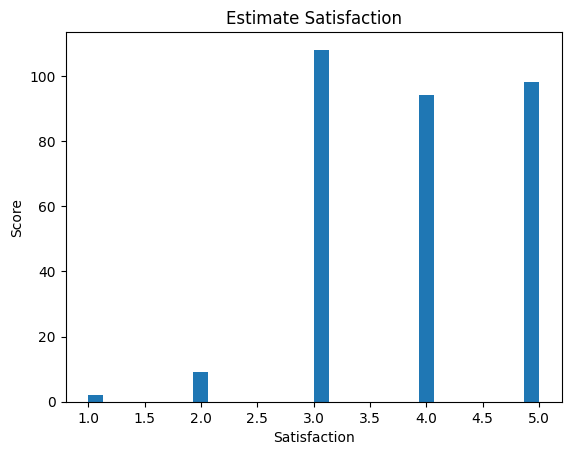

In [21]:
plt.hist(df['EmpSatisfaction'], bins=30)

plt.xlabel('Satisfaction')
plt.ylabel('Score')
plt.title('Estimate Satisfaction')

plt.show()

## **With this graph we got the score wise satisfaction of employees**

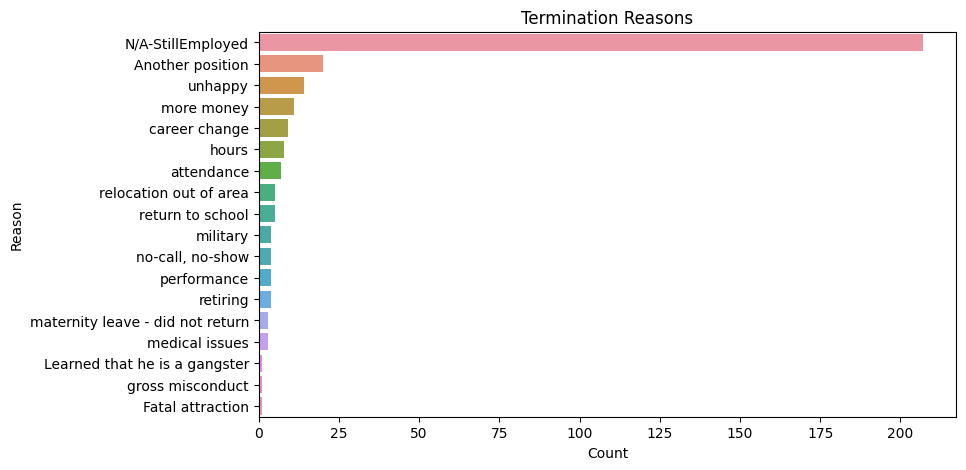

In [22]:
grouped = df.groupby('TermReason')['Employee_Name'].count().reset_index(name='Count')
grouped = grouped.sort_values('Count', ascending=False)

fig, ax = plt.subplots(figsize=(9, 5))
sns.barplot(x='Count', y='TermReason', data=grouped, ax=ax)
ax.set_title('Termination Reasons')
ax.set_xlabel('Count')
ax.set_ylabel('Reason')

plt.show()

## **We got the insight related to the termination Reason of employee**

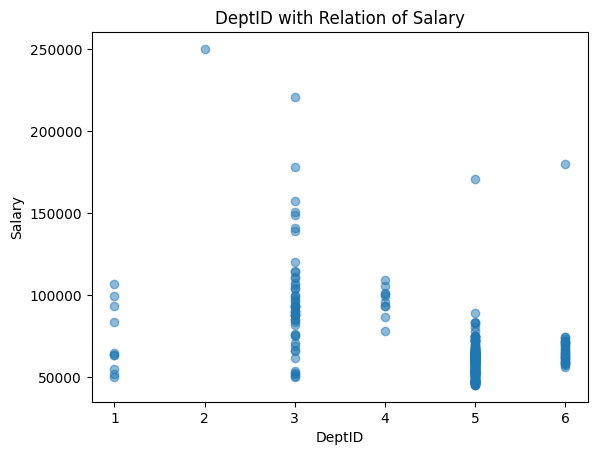

In [23]:
plt.scatter(df['DeptID'],df['Salary'],alpha=0.5 )

plt.title('DeptID with Relation of Salary')
plt.xlabel('DeptID')
plt.ylabel('Salary') 

plt.show()

## **In this Scatter Graph it shows DeptID 2 gets higher salary in compare of rest DeptID**

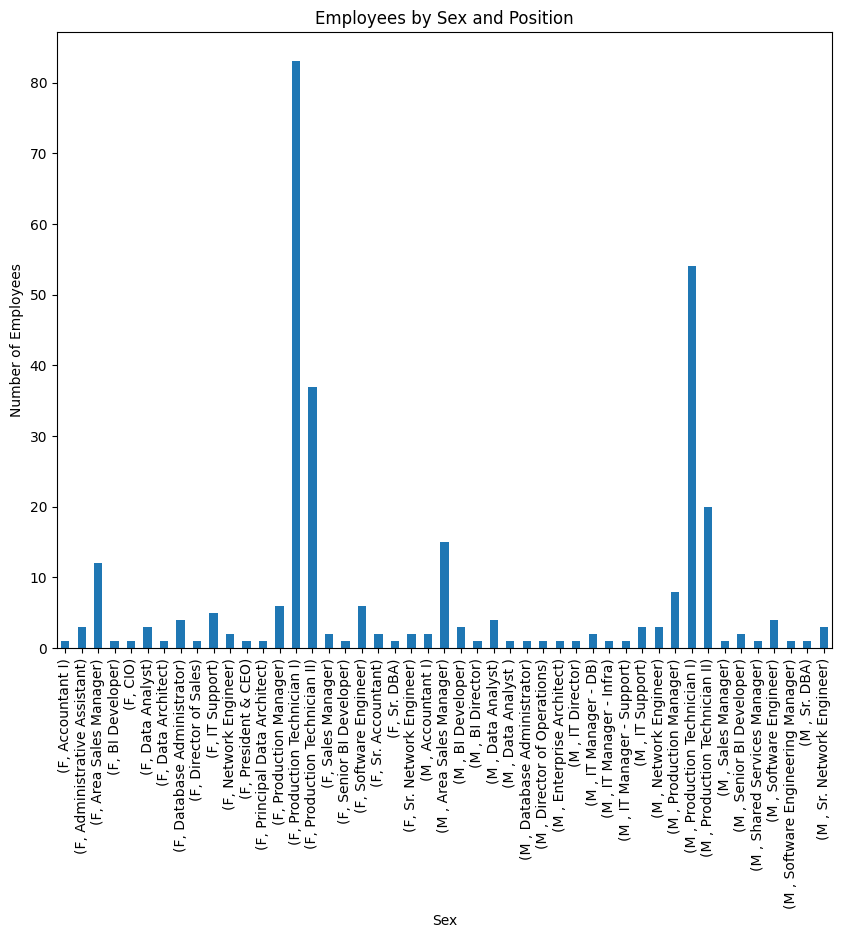

In [27]:
grouped = df.groupby(['Sex', 'Position'])['Employee_Name'].count()

fig, ax = plt.subplots(figsize=(10, 8))
grouped.plot(kind='bar', ax=None)

ax.set_title('Employees by Sex and Position')
ax.set_xlabel('Sex')
ax.set_ylabel('Number of Employees')

plt.show()

## **we got Bar Graph Chart of Comparision box plot chart of the Employees by sex and position**

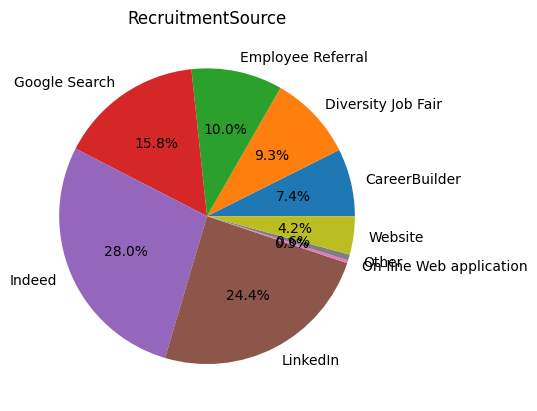

In [28]:
Recruitment = df.groupby('RecruitmentSource').size()

plt.pie(Recruitment, labels=Recruitment.index, autopct='%1.1f%%')


plt.title('RecruitmentSource')
plt.show()

## **we have the data  that the Most of the people recruited via Indeed & linkedIn**

In [30]:
df.to_csv("Cleaned_HR_ Dataset", index = False)